In [1]:
# importación de librerías
import pandas as pd
import numpy as np
import csv
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Carga y visualización del archivo csv al directorio
wineData = pd.read_csv('/content/drive/MyDrive/Siglo 21/Seminario Profesional/winemag-data-130k-v2.csv', sep=',')
wineData = wineData.drop(columns='Unnamed: 0')
wineData.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Contar en todo el dataset los valores null o vacíos que tengo de cada variable
null_counts = wineData.isnull().sum()
print(null_counts)

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [4]:
# Reemplazo de valores nulls Country, Points, Price
wineData['country'] = wineData['country'].fillna('Sin Información')
wineData['province'] = wineData['province'].fillna('Sin Información')
wineData['price'] = wineData['price'].fillna(0)
wineData['points'] = wineData['points'].fillna(0)

In [5]:
# Cambiar la variable points y price a valor numerico y verificar tipo de datos de cada variable
wineData['points'] = pd.to_numeric(wineData['points'], errors='coerce')
wineData['price'] = pd.to_numeric(wineData['price'], errors='coerce')
print(wineData.dtypes)

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [6]:
# Detalle de Country, Description y Points

wineData[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [7]:
# Agrupar Country (País)
country = wineData.groupby("country")

# Resumen estadístico de todos los países
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3800.0  24.226316  23.441197   0.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2329.0  34.905109  48.869989   0.0  15.00   
Austria                  98.0  3345.0  25.741405  27.376371   0.0  14.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 22.0  34.00  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

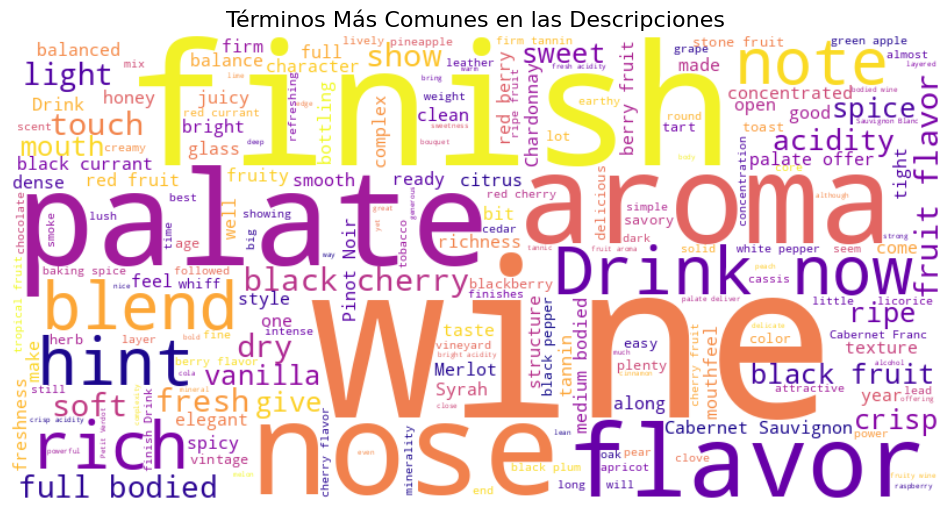

In [8]:
# Generar nube de palabras
text = " ".join(wineData['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, colormap='plasma').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Términos Más Comunes en las Descripciones", fontsize=16)
plt.show()

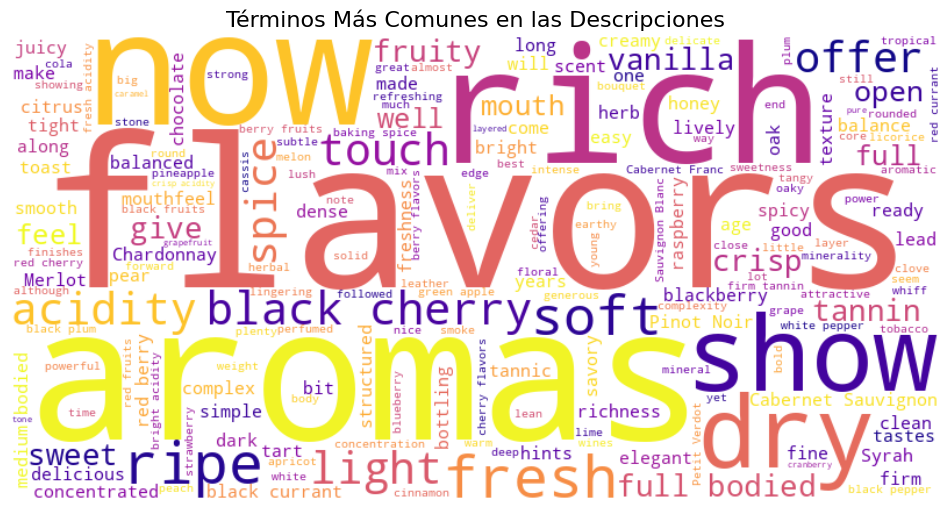

In [9]:
# Generar nube de palabras con lista de excepción

custom_stopwords = set(STOPWORDS).union([
    "wine", "vineyard", "taster", "bottle", "drink", "flavor",
    "character", "aroma", "finish", "palate", "taste", "notes",
    "nose", "glass", "blend", "varietal", "structure", "hint",
    "color", "fruit", "year", "style", "winery", "vintage"
])

text = " ".join(wineData['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords, colormap='plasma').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Términos Más Comunes en las Descripciones", fontsize=16)
plt.show()

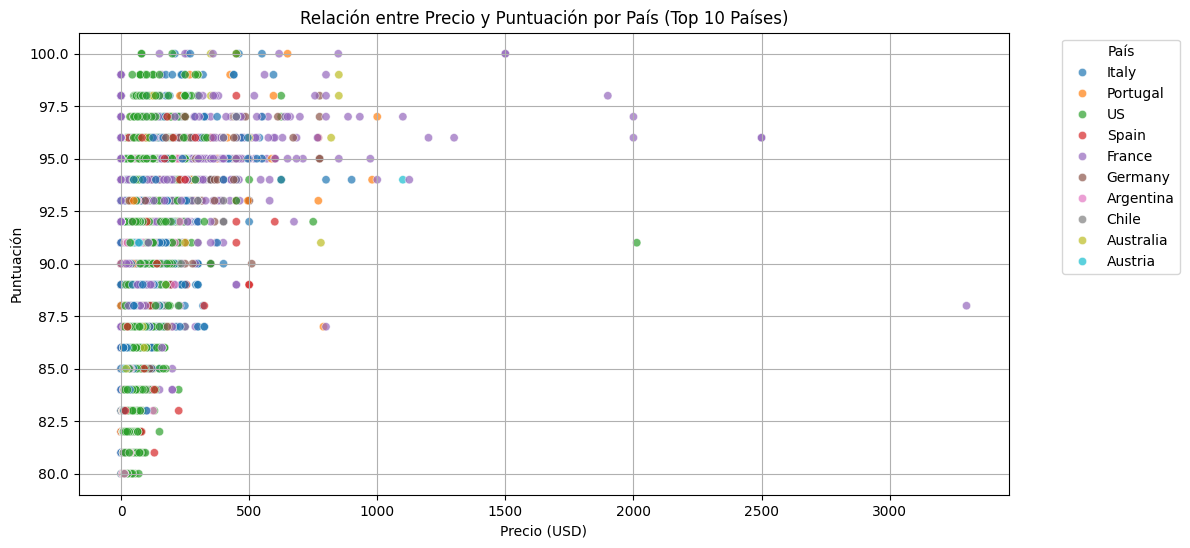

In [10]:
# Filtrar los 10 países con más cantidad de reseñas
top_countries = wineData['country'].value_counts().head(10).index
wineData_filtered = wineData[wineData['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=wineData_filtered, x='price', y='points', hue='country', alpha=0.7)
plt.title("Relación entre Precio y Puntuación por País (Top 10 Países)")
plt.xlabel("Precio (USD)")
plt.ylabel("Puntuación")
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-11-40e0344e9475>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_varieties.values, y=top_varieties.index, palette="magma")
<ipython-input-11-40e0344e9475>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


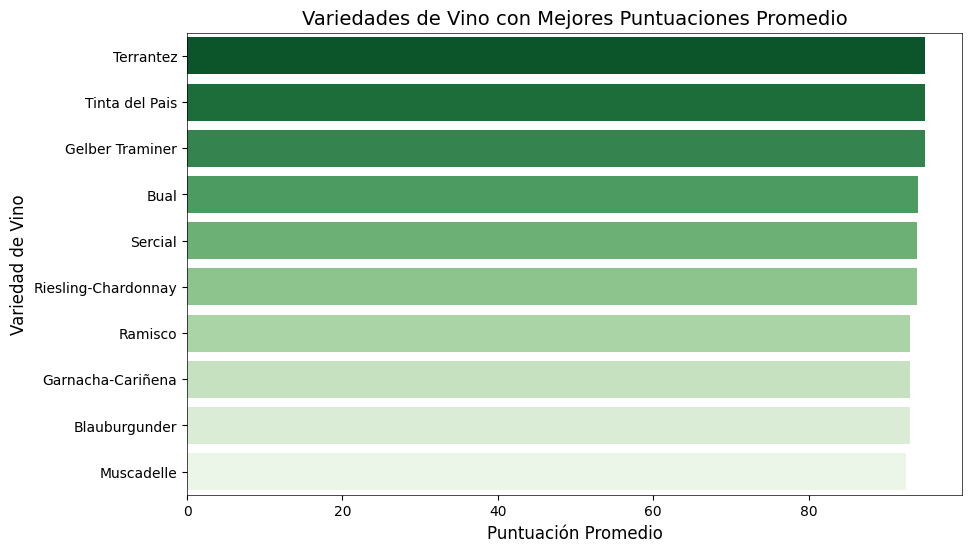

In [11]:
#Variedades de vino con mejores puntuaciones promedio
top_varieties = wineData.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_varieties.values, y=top_varieties.index, palette="magma")

# Aplicar gradiente de verdes al gráfico
sns.barplot(
    x=top_varieties.values,
    y=top_varieties.index,
    palette=sns.color_palette("Greens_r", len(top_varieties))
)
# Ajustar el grosor de las líneas para que sean más finas
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

plt.title("Variedades de Vino con Mejores Puntuaciones Promedio", fontsize=14)
plt.xlabel("Puntuación Promedio", fontsize=12)
plt.ylabel("Variedad de Vino", fontsize=12)
plt.show()

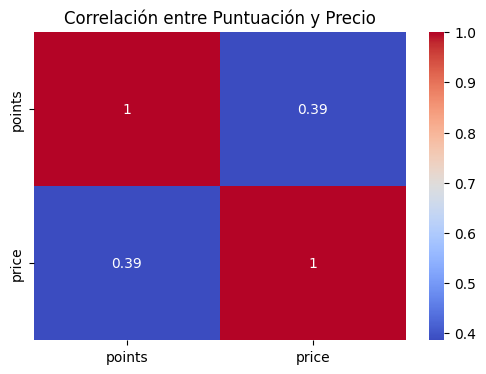

In [12]:
#Armado de Matriz de correlación de "Points" y "Price"
correlation = wineData[['points', 'price']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlación entre Puntuación y Precio")
plt.show()

<ipython-input-13-ca6d7eeb197c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions_avg.values, y=regions_avg.index, palette="viridis")


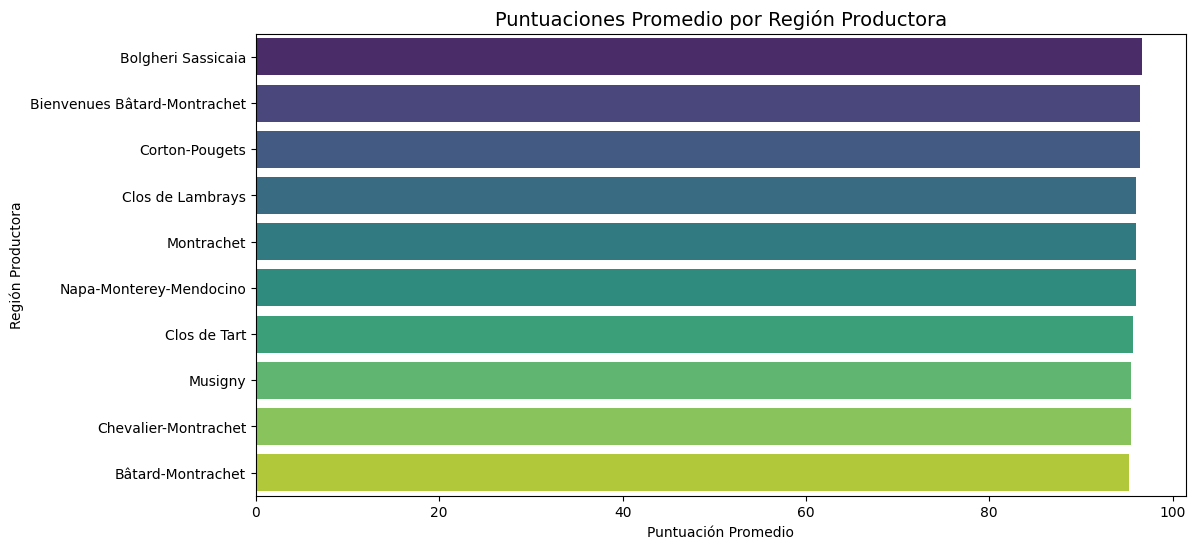

In [13]:
#Puntuaciones promedio por región productora
regions_avg = wineData.groupby('region_1')['points'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=regions_avg.values, y=regions_avg.index, palette="viridis")
plt.title("Puntuaciones Promedio por Región Productora", fontsize=14)
plt.xlabel("Puntuación Promedio")
plt.ylabel("Región Productora")
plt.show()

<ipython-input-14-4d4acaf7d093>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=wineData, x='points_category', y='price', palette="muted", inner="quartile")


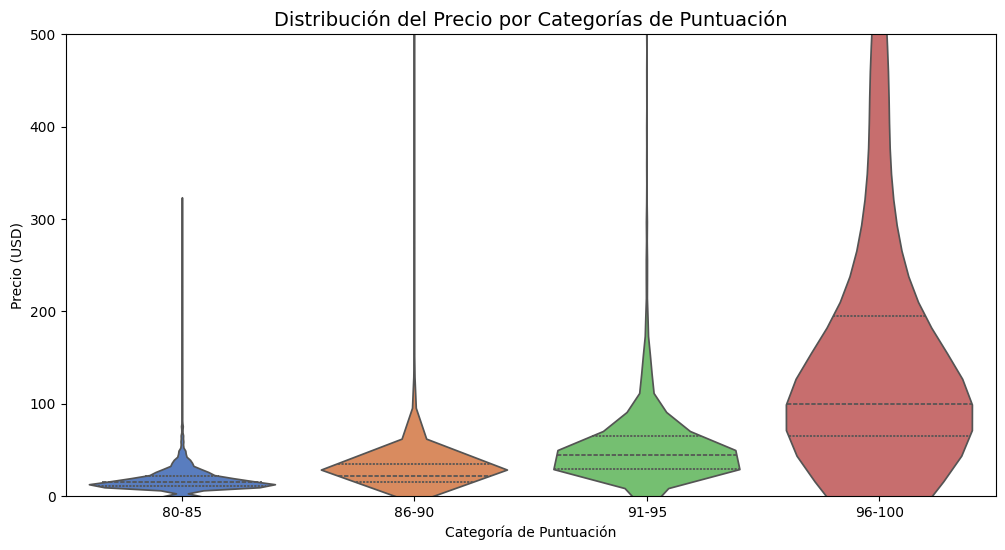

In [14]:
# Crear una columna categórica para las puntuaciones
wineData['points_category'] = pd.cut(wineData['points'], bins=[80, 85, 90, 95, 100], labels=['80-85', '86-90', '91-95', '96-100'])

# Gráfico de violín para mostrar la distribución de precios por categoría de puntuación
plt.figure(figsize=(12, 6))
sns.violinplot(data=wineData, x='points_category', y='price', palette="muted", inner="quartile")
plt.title("Distribución del Precio por Categorías de Puntuación", fontsize=14)
plt.xlabel("Categoría de Puntuación")
plt.ylabel("Precio (USD)")
plt.ylim(0, 500)  # Limitar para excluir valores extremos en el análisis visual
plt.show()

<ipython-input-15-76171944cf58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=varieties_by_country.values, y=varieties_by_country.index, palette="coolwarm")


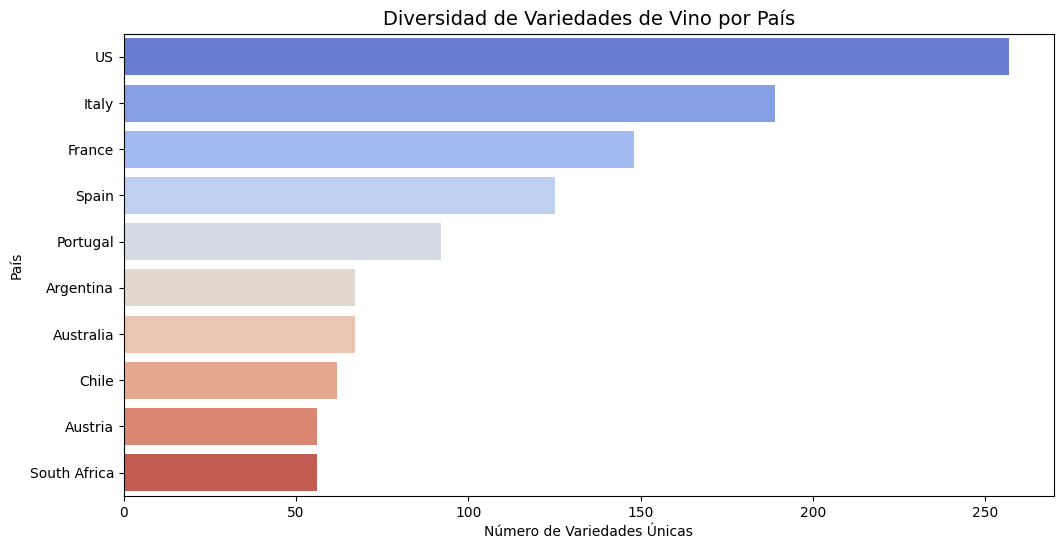

In [15]:
# Contar el número de variedades únicas por país
varieties_by_country = wineData.groupby('country')['variety'].nunique().sort_values(ascending=False).head(10)

# Gráfico de barras para mostrar la diversidad de variedades por país
plt.figure(figsize=(12, 6))
sns.barplot(x=varieties_by_country.values, y=varieties_by_country.index, palette="coolwarm")
plt.title("Diversidad de Variedades de Vino por País", fontsize=14)
plt.xlabel("Número de Variedades Únicas")
plt.ylabel("País")
plt.show()

In [16]:
with open('TP 4_analisis_exploratorio_vinos.py', 'w') as f:
    f.write('''# importación de librerías
import pandas as pd
import numpy as np
import csv
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Carga y visualización del archivo csv al directorio
wineData = pd.read_csv('/content/drive/MyDrive/Siglo 21/Seminario Profesional/winemag-data-130k-v2.csv', sep=',')
wineData = wineData.drop(columns='Unnamed: 0')
wineData.head(5)

# Contar en todo el dataset los valores null o vacíos que tengo de cada variable
null_counts = wineData.isnull().sum()
print(null_counts)

# Reemplazo de valores nulls Country, Points, Price
wineData['country'] = wineData['country'].fillna('Sin Información')
wineData['province'] = wineData['province'].fillna('Sin Información')
wineData['price'] = wineData['price'].fillna(0)
wineData['points'] = wineData['points'].fillna(0)

# Cambiar la variable points y price a valor numerico y verificar tipo de datos de cada variable
wineData['points'] = pd.to_numeric(wineData['points'], errors='coerce')
wineData['price'] = pd.to_numeric(wineData['price'], errors='coerce')
print(wineData.dtypes)

# Detalle de Country, Description y Points

wineData[["country", "description","points"]].head()

# Agrupar Country (País)
country = wineData.groupby("country")

# Resumen estadístico de todos los países
country.describe().head()

# Generar nube de palabras
text = " ".join(wineData['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, colormap='plasma').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Términos Más Comunes en las Descripciones", fontsize=16)
plt.show()

# Generar nube de palabras con lista de excepción

custom_stopwords = set(STOPWORDS).union([
    "wine", "vineyard", "taster", "bottle", "drink", "flavor",
    "character", "aroma", "finish", "palate", "taste", "notes",
    "nose", "glass", "blend", "varietal", "structure", "hint",
    "color", "fruit", "year", "style", "winery", "vintage"
])

text = " ".join(wineData['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords, colormap='plasma').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Términos Más Comunes en las Descripciones", fontsize=16)
plt.show()

# Filtrar los 10 países con más cantidad de reseñas
top_countries = wineData['country'].value_counts().head(10).index
wineData_filtered = wineData[wineData['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=wineData_filtered, x='price', y='points', hue='country', alpha=0.7)
plt.title("Relación entre Precio y Puntuación por País (Top 10 Países)")
plt.xlabel("Precio (USD)")
plt.ylabel("Puntuación")
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#Variedades de vino con mejores puntuaciones promedio
top_varieties = wineData.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_varieties.values, y=top_varieties.index, palette="magma")

# Aplicar gradiente de verdes al gráfico
sns.barplot(
    x=top_varieties.values,
    y=top_varieties.index,
    palette=sns.color_palette("Greens_r", len(top_varieties))
)
# Ajustar el grosor de las líneas para que sean más finas
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

plt.title("Variedades de Vino con Mejores Puntuaciones Promedio", fontsize=14)
plt.xlabel("Puntuación Promedio", fontsize=12)
plt.ylabel("Variedad de Vino", fontsize=12)
plt.show()

#Armado de Matriz de correlación de "Points" y "Price"
correlation = wineData[['points', 'price']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlación entre Puntuación y Precio")
plt.show()

#Puntuaciones promedio por región productora
regions_avg = wineData.groupby('region_1')['points'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=regions_avg.values, y=regions_avg.index, palette="viridis")
plt.title("Puntuaciones Promedio por Región Productora", fontsize=14)
plt.xlabel("Puntuación Promedio")
plt.ylabel("Región Productora")
plt.show()

# Crear una columna categórica para las puntuaciones
wineData['points_category'] = pd.cut(wineData['points'], bins=[80, 85, 90, 95, 100], labels=['80-85', '86-90', '91-95', '96-100'])

# Gráfico de violín para mostrar la distribución de precios por categoría de puntuación
plt.figure(figsize=(12, 6))
sns.violinplot(data=wineData, x='points_category', y='price', palette="muted", inner="quartile")
plt.title("Distribución del Precio por Categorías de Puntuación", fontsize=14)
plt.xlabel("Categoría de Puntuación")
plt.ylabel("Precio (USD)")
plt.ylim(0, 500)  # Limitar para excluir valores extremos en el análisis visual
plt.show()

# Contar el número de variedades únicas por país
varieties_by_country = wineData.groupby('country')['variety'].nunique().sort_values(ascending=False).head(10)

# Gráfico de barras para mostrar la diversidad de variedades por país
plt.figure(figsize=(12, 6))
sns.barplot(x=varieties_by_country.values, y=varieties_by_country.index, palette="coolwarm")
plt.title("Diversidad de Variedades de Vino por País", fontsize=14)
plt.xlabel("Número de Variedades Únicas")
plt.ylabel("País")
plt.show()
''')

In [17]:
from google.colab import files
files.download('TP 4_analisis_exploratorio_vinos.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>